In [1]:
from google.colab import files
uploaded = files.upload()

Saving clean_reviews_all_banks.csv to clean_reviews_all_banks.csv


In [2]:
import pandas as pd
df = pd.read_csv('clean_reviews_all_banks.csv')  # Replace with your filename

Separate English and Non-English reviews for individual analysis.

In [3]:
# Check if review is mostly English
# labels emojis and other words as others
def is_mostly_english(text, threshold=0.8):
    english_chars = sum(1 for c in text if ord(c) < 128)
    return (english_chars / max(len(text), 1)) >= threshold

lang_filtered_df = df.copy()
lang_filtered_df["language"] = lang_filtered_df["review"].apply(lambda x: "en" if is_mostly_english(x) else "other")

lang_filtered_df

,review,rating,date,bank,source,language
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other
...,...,...,...,...,...,...
6398,Best,5,2025-01-13,Dashen Bank,Google Play Store,en
6399,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play Store,en
6400,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play Store,en
6401,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play Store,en


In [5]:
# Filter rows where language is "other" and drop the "clean_review" column
other_lang_df = lang_filtered_df[lang_filtered_df["language"] == "other"].copy()

# Save to CSV
other_lang_df.to_csv("non_english_reviews.csv", index=False, encoding="utf-8")

# Print the filtered DataFrame (optional)
other_lang_df

,review,rating,date,bank,source,language
4,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other
12,👌👍,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other
38,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play Store,other
48,Ronaldo 🇵🇹 🥇,5,2025-05-25,Commercial Bank of Ethiopia,Google Play Store,other
54,👍,5,2025-05-24,Commercial Bank of Ethiopia,Google Play Store,other
...,...,...,...,...,...,...
6324,Send to oher bank የሚለዉ ዉስጥ ገብተን ወደ addisintern...,2,2025-01-29,Dashen Bank,Google Play Store,other
6332,V good ❗️,5,2025-01-24,Dashen Bank,Google Play Store,other
6339,ጥሩ ነው,5,2025-01-21,Dashen Bank,Google Play Store,other
6340,ስም ብቻ 😏,2,2025-01-21,Dashen Bank,Google Play Store,other


In [6]:
# Filter rows where language is "en"
en_lang_df = lang_filtered_df[lang_filtered_df["language"] == "en"].copy()

# Save to CSV
en_lang_df.to_csv("english_reviews.csv", index=False, encoding="utf-8")

# Print the filtered DataFrame (optional)
en_lang_df

,review,rating,date,bank,source,language
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en
5,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en
...,...,...,...,...,...,...
6398,Best,5,2025-01-13,Dashen Bank,Google Play Store,en
6399,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play Store,en
6400,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play Store,en
6401,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play Store,en


Data preparation and TextBlob sentiment analysis for non-English reviews.

In [7]:
# custom polarity for emojis
import re
emoji_sentiment = {
    '👍': {'polarity': 0.6, 'subjectivity': 0.3},
    '👎': {'polarity': -0.6, 'subjectivity': 0.3},
    '❤️': {'polarity': 0.9, 'subjectivity': 0.6},
    '😂': {'polarity': 0.8, 'subjectivity': 0.5},
    '😡': {'polarity': -0.9, 'subjectivity': 0.8},
    '😭': {'polarity': -0.7, 'subjectivity': 0.6},
    '🙏': {'polarity': 0.4, 'subjectivity': 0.5},
    '😍': {'polarity': 0.9, 'subjectivity': 0.8},

}
#identify emojis
def is_emoji_only(text):
    if not isinstance(text, str):
        return False
    text = text.strip()
    return bool(re.fullmatch(r'[\W_]+', text)) and any(char in emoji_sentiment for char in text)


In [8]:

%pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00


Translate Amharic reviews and perform TextBlob analysis on both the emojis and the translated reviews.

In [9]:
from textblob import TextBlob
from deep_translator import GoogleTranslator
import pandas as pd
import time

def analyze_sentiment(text):
    try:
        if pd.isna(text) or str(text).strip() == '':
            return {'translation': '', 'polarity': 0, 'subjectivity': 0}

        text = str(text).strip()

        # Case 1: Emoji-only handling
        if is_emoji_only(text):
            polarity = 0
            subjectivity = 0
            for char in text:
                if char in emoji_sentiment:
                    polarity += emoji_sentiment[char]['polarity']
                    subjectivity += emoji_sentiment[char]['subjectivity']
            count = sum(1 for char in text if char in emoji_sentiment)
            if count > 0:
                polarity /= count
                subjectivity /= count
            label = 'positive' if polarity > 0.1 else 'negative' if polarity < -0.1 else 'neutral'

            return {
                'translation': text,
                'textblob_score': polarity,
                'textblob_label': label,
                'subjectivity': subjectivity
            }

        # Case 2: Normal text translation + sentiment
        max_retries = 3
        for attempt in range(max_retries):
            try:
                translated = GoogleTranslator(source='auto', target='en').translate(text)
                break
            except Exception as e:
                if attempt == max_retries - 1:
                    print(f"Translation failed for: {text[:50]}... Error: {str(e)}")
                    return {
                            'translation': '',
                            'textblob_score': 0,
                            'textblob_label': 'neutral',
                            'subjectivity': 0
                                        }
                time.sleep(1)

        analysis = TextBlob(translated)
        polarity = analysis.sentiment.polarity
        subjectivity = analysis.sentiment.subjectivity
        label = 'positive' if polarity > 0.1 else 'negative' if polarity < -0.1 else 'neutral'

        return {
            'translation': translated,
            'textblob_score': polarity,
            'textblob_label': label,
            'subjectivity': subjectivity
        }

    except Exception as e:
        print(f"Error processing: {text[:50]}... Error: {str(e)}")
        return {
            'translation': '',
            'textblob_score': 0,
            'textblob_label': 'neutral',
            'subjectivity': 0
        }


In [10]:
# Step 1: Apply and expand the sentiment analysis
results_with_emoji = other_lang_df['review'].apply(analyze_sentiment).apply(pd.Series)

other_lang_df.loc[:, 'review'] = results_with_emoji['translation'].values
other_lang_df.loc[:, 'textblob_score'] = results_with_emoji['textblob_score']
other_lang_df.loc[:, 'textblob_label'] = results_with_emoji['textblob_label']
other_lang_df.loc[:, 'subjectivity'] = results_with_emoji['subjectivity']

Error processing: ♡... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: ❤️... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: 😔... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: 😁... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: ❤❤❤❤❤... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: 👌... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: ❤❤❤❤❤... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: ❤❤❤... Error: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>
Error processing: 😀😀😀😀😀... Error: The `text` 

In [11]:
other_lang_df

,review,rating,date,bank,source,language,textblob_score,textblob_label,subjectivity
4,The name of our account is the name of our acc...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000
12,👌👍,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000
38,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000
48,Ronaldo 🇵🇹 🥇,5,2025-05-25,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000
54,👍,5,2025-05-24,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000
...,...,...,...,...,...,...,...,...,...
6324,Second to Oher Bank is not working in intersec...,2,2025-01-29,Dashen Bank,Google Play Store,other,0.00,neutral,0.000000
6332,V good ❗️,5,2025-01-24,Dashen Bank,Google Play Store,other,0.70,positive,0.600000
6339,it's good,5,2025-01-21,Dashen Bank,Google Play Store,other,0.70,positive,0.600000
6340,Name only,2,2025-01-21,Dashen Bank,Google Play Store,other,0.00,neutral,1.000000


Clean data by removing missing values and trimming spaces.

In [12]:
# Find rows where translation is empty or whitespace
empty_mask = other_lang_df['review'].str.strip() == ''
print(empty_mask.sum())
print("Missing values ", other_lang_df.isna().sum())

32
Missing values  review            0
rating            0
date              0
bank              0
source            0
language          0
textblob_score    0
textblob_label    0
subjectivity      0
dtype: int64


In [13]:
# check for spaces or null rows
other_lang_df = other_lang_df[~(other_lang_df['review'].str.strip() == '')]
other_lang_df

,review,rating,date,bank,source,language,textblob_score,textblob_label,subjectivity
4,The name of our account is the name of our acc...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000
12,👌👍,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000
38,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000
48,Ronaldo 🇵🇹 🥇,5,2025-05-25,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000
54,👍,5,2025-05-24,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000
...,...,...,...,...,...,...,...,...,...
6324,Second to Oher Bank is not working in intersec...,2,2025-01-29,Dashen Bank,Google Play Store,other,0.00,neutral,0.000000
6332,V good ❗️,5,2025-01-24,Dashen Bank,Google Play Store,other,0.70,positive,0.600000
6339,it's good,5,2025-01-21,Dashen Bank,Google Play Store,other,0.70,positive,0.600000
6340,Name only,2,2025-01-21,Dashen Bank,Google Play Store,other,0.00,neutral,1.000000


VADER sentiment analysis on emojis and translated reviews

In [14]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to get compound score and sentiment label
def get_vader_score_and_label(text):
    if isinstance(text, str):
        compound = analyzer.polarity_scores(text)['compound']
        if compound >= 0.05:
            label = 'positive'
        elif compound <= -0.05:
            label = 'negative'
        else:
            label = 'neutral'
        return pd.Series([compound, label])
    else:
        return pd.Series([None, None])

# Apply function to the 'review' column
other_lang_df[['vader_score', 'vader_label']] = other_lang_df['review'].apply(get_vader_score_and_label).copy()

# Preview
other_lang_df


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


<ipython-input-14-4c4f131a1158>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_lang_df[['vader_score', 'vader_label']] = other_lang_df['review'].apply(get_vader_score_and_label).copy()
<ipython-input-14-4c4f131a1158>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_lang_df[['vader_score', 'vader_label']] = other_lang_df['review'].apply(get_vader_score_and_label).copy()


,review,rating,date,bank,source,language,textblob_score,textblob_label,subjectivity,vader_score,vader_label
4,The name of our account is the name of our acc...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000,-0.6652,negative
12,👌👍,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000,0.7297,positive
38,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000,0.0000,neutral
48,Ronaldo 🇵🇹 🥇,5,2025-05-25,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000,0.4767,positive
54,👍,5,2025-05-24,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
6324,Second to Oher Bank is not working in intersec...,2,2025-01-29,Dashen Bank,Google Play Store,other,0.00,neutral,0.000000,0.0000,neutral
6332,V good ❗️,5,2025-01-24,Dashen Bank,Google Play Store,other,0.70,positive,0.600000,0.4404,positive
6339,it's good,5,2025-01-21,Dashen Bank,Google Play Store,other,0.70,positive,0.600000,0.4404,positive
6340,Name only,2,2025-01-21,Dashen Bank,Google Play Store,other,0.00,neutral,1.000000,0.0000,neutral


DistilBERT sentiment analysis on emojis and translated reviews

In [15]:

from transformers import pipeline

# Load the DistilBERT sentiment model once
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [16]:
def combined_sentiment(text):
    # Handle empty or NaN
    if not isinstance(text, str) or text.strip() == "":
        return {"score": 0.0, "label": "neutral"}

    text = text.strip()

    # If emoji only, average emoji sentiment
    if is_emoji_only(text):
        polarity = 0.0
        count = 0
        for ch in text:
            if ch in emoji_sentiment:
                polarity += emoji_sentiment[ch]["polarity"]
                count += 1
        if count > 0:
            polarity /= count
        else:
            polarity = 0.0  # No emojis found in dict
        # Define labels by polarity thresholds (same as DistilBERT for consistency)
        if polarity >= 0.05:
            label = "positive"
        elif polarity <= -0.05:
            label = "negative"
        else:
            label = "neutral"
        return {"score": polarity, "label": label}

    # Else run DistilBERT sentiment
    results = sentiment_pipeline(text)
    label = results[0]["label"].lower()
    score = results[0]["score"]
    # Convert POSITIVE/NEGATIVE to polarity-like score (+/-)
    polarity = score if label == "positive" else -score

    # Return with normalized polarity and label
    return {"score": polarity, "label": label}


In [17]:
other_lang_df[['DistilBERT_score', 'DistilBERT_label']] = other_lang_df['review'].apply(combined_sentiment).apply(pd.Series)


<ipython-input-17-578b03ec5027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_lang_df[['DistilBERT_score', 'DistilBERT_label']] = other_lang_df['review'].apply(combined_sentiment).apply(pd.Series)
<ipython-input-17-578b03ec5027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_lang_df[['DistilBERT_score', 'DistilBERT_label']] = other_lang_df['review'].apply(combined_sentiment).apply(pd.Series)


In [18]:
other_lang_df

,review,rating,date,bank,source,language,textblob_score,textblob_label,subjectivity,vader_score,vader_label,DistilBERT_score,DistilBERT_label
4,The name of our account is the name of our acc...,4,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000,-0.6652,negative,-0.998924,negative
12,👌👍,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000,0.7297,positive,0.600000,positive
38,🤬🤬🤬🤬 network 🛜,1,2025-05-26,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000,0.0000,neutral,-0.685613,negative
48,Ronaldo 🇵🇹 🥇,5,2025-05-25,Commercial Bank of Ethiopia,Google Play Store,other,0.00,neutral,0.000000,0.4767,positive,0.994829,positive
54,👍,5,2025-05-24,Commercial Bank of Ethiopia,Google Play Store,other,0.60,positive,0.300000,0.0000,neutral,0.600000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,Second to Oher Bank is not working in intersec...,2,2025-01-29,Dashen Bank,Google Play Store,other,0.00,neutral,0.000000,0.0000,neutral,-0.999644,negative
6332,V good ❗️,5,2025-01-24,Dashen Bank,Google Play Store,other,0.70,positive,0.600000,0.4404,positive,0.999386,positive
6339,it's good,5,2025-01-21,Dashen Bank,Google Play Store,other,0.70,positive,0.600000,0.4404,positive,0.999836,positive
6340,Name only,2,2025-01-21,Dashen Bank,Google Play Store,other,0.00,neutral,1.000000,0.0000,neutral,-0.959507,negative


In [19]:
uploaded_utils = files.upload()

Saving sentiment_analyzers.py to sentiment_analyzers.py


TextBlob and VADER sentiment analysis on English reviews using custom utility functions

In [20]:
from sentiment_analyzers import download_nltk_resources, apply_sentiment_analysis

# Run once
download_nltk_resources()

# apply analysis
en_df = apply_sentiment_analysis(en_lang_df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
en_df

,review,rating,date,bank,source,language,vader_score,vader_label,textblob_score,textblob_label
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.0000,neutral,0.000000,neutral
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.4404,positive,0.700000,positive
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.0000,neutral,0.000000,neutral
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en,0.1739,positive,0.234167,positive
5,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en,0.6369,positive,1.000000,positive
...,...,...,...,...,...,...,...,...,...,...
6398,Best,5,2025-01-13,Dashen Bank,Google Play Store,en,0.6369,positive,1.000000,positive
6399,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play Store,en,0.8074,positive,0.587500,positive
6400,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play Store,en,0.6369,positive,1.000000,positive
6401,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play Store,en,0.0000,neutral,0.000000,neutral


DistilBERT sentiment analysis on English Reviews

In [22]:
def en_distilbert_sentiment(text):
    try:
        if not isinstance(text, str) or not text.strip():  # Check for empty/non-string
            return pd.Series([0.0, "neutral"])

        result = sentiment_pipeline(text)[0]
        score = result['score']
        label = result['label'].lower()  # Ensure lowercase consistency

        # Convert to polarity-like score (-1 to 1)
        polarity = score if label == 'positive' else -score
        return pd.Series([polarity, label])

    except Exception as e:
        print(f"Error processing text: '{text}'. Error: {e}")  # Log errors
        return pd.Series([0.0, "neutral"])

# Usage (with faster result_type="expand")
en_df[['DistilBERT_score', 'DistilBERT_label']] = en_df['review'].apply(
    en_distilbert_sentiment
)

In [23]:
en_df

,review,rating,date,bank,source,language,vader_score,vader_label,textblob_score,textblob_label,DistilBERT_score,DistilBERT_label
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.0000,neutral,0.000000,neutral,-0.995335,negative
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.4404,positive,0.700000,positive,0.999816,positive
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.0000,neutral,0.000000,neutral,-0.999779,negative
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en,0.1739,positive,0.234167,positive,-0.990516,negative
5,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en,0.6369,positive,1.000000,positive,0.999794,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
6398,Best,5,2025-01-13,Dashen Bank,Google Play Store,en,0.6369,positive,1.000000,positive,0.999794,positive
6399,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen Bank,Google Play Store,en,0.8074,positive,0.587500,positive,0.999779,positive
6400,It's Best waww 🙏,5,2025-01-13,Dashen Bank,Google Play Store,en,0.6369,positive,1.000000,positive,0.999744,positive
6401,Always one step ahead,5,2025-01-13,Dashen Bank,Google Play Store,en,0.0000,neutral,0.000000,neutral,0.999770,positive


In [40]:
other_lang_df = other_lang_df.drop(columns=['subjectivity'])

Merge both datasets into a single dataset

In [24]:
combined_reviews_df = pd.concat([en_df, other_lang_df], axis=0, ignore_index=True)
combined_reviews_df

,review,rating,date,bank,source,language,vader_score,vader_label,textblob_score,textblob_label,DistilBERT_score,DistilBERT_label,subjectivity
0,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.0000,neutral,0.000000,neutral,-0.995335,negative,NaN
1,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.4404,positive,0.700000,positive,0.999816,positive,NaN
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play Store,en,0.0000,neutral,0.000000,neutral,-0.999779,negative,NaN
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en,0.1739,positive,0.234167,positive,-0.990516,negative,NaN
4,best,5,2025-06-04,Commercial Bank of Ethiopia,Google Play Store,en,0.6369,positive,1.000000,positive,0.999794,positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Second to Oher Bank is not working in intersec...,2,2025-01-29,Dashen Bank,Google Play Store,other,0.0000,neutral,0.000000,neutral,-0.999644,negative,0.000000
6367,V good ❗️,5,2025-01-24,Dashen Bank,Google Play Store,other,0.4404,positive,0.700000,positive,0.999386,positive,0.600000
6368,it's good,5,2025-01-21,Dashen Bank,Google Play Store,other,0.4404,positive,0.700000,positive,0.999836,positive,0.600000
6369,Name only,2,2025-01-21,Dashen Bank,Google Play Store,other,0.0000,neutral,0.000000,neutral,-0.959507,negative,1.000000


Visual the comparison of all three sentiment analysis methods.

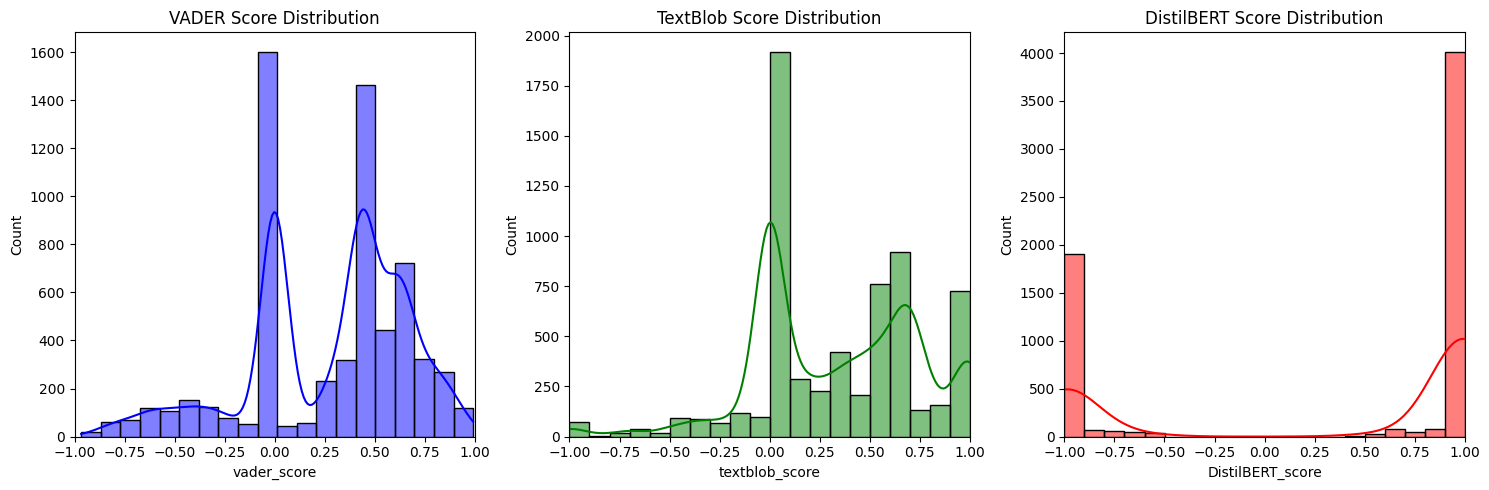

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 5))

# VADER
plt.subplot(1, 3, 1)
sns.histplot(combined_reviews_df['vader_score'], bins=20, kde=True, color='blue')
plt.title('VADER Score Distribution')
plt.xlim(-1, 1)

# TextBlob
plt.subplot(1, 3, 2)
sns.histplot(combined_reviews_df['textblob_score'], bins=20, kde=True, color='green')
plt.title('TextBlob Score Distribution')
plt.xlim(-1, 1)

# DistilBERT
plt.subplot(1, 3, 3)
sns.histplot(combined_reviews_df['DistilBERT_score'], bins=20, kde=True, color='red')
plt.title('DistilBERT Score Distribution')
plt.xlim(-1, 1)  # Adjust if DistilBERT uses [0, 1]

plt.tight_layout()
plt.show()

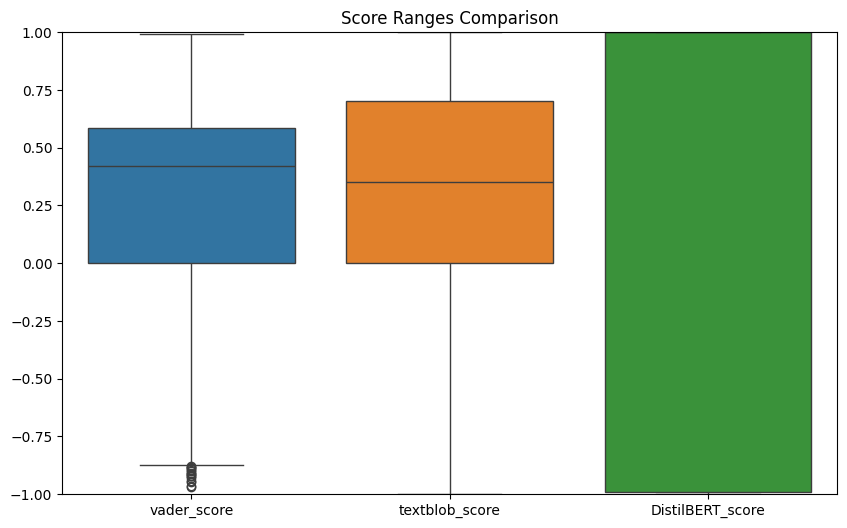

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_reviews_df[['vader_score', 'textblob_score', 'DistilBERT_score']])
plt.title('Score Ranges Comparison')
plt.ylim(-1, 1)  # Adjust if needed
plt.show()

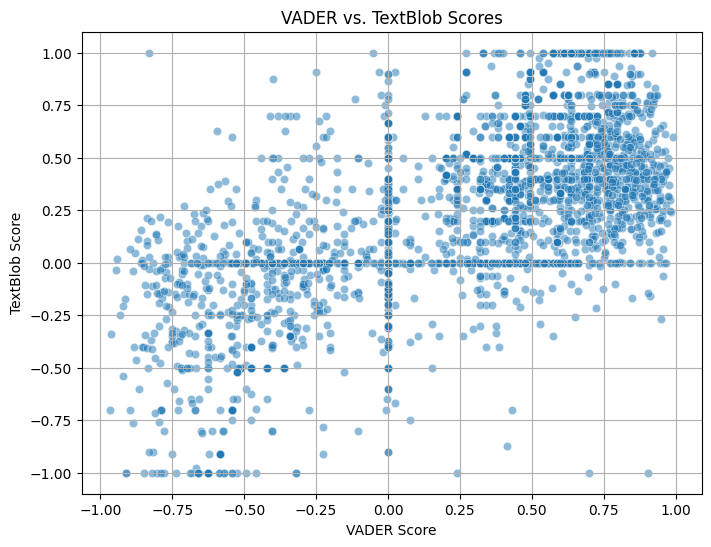

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_score', y='textblob_score', data=combined_reviews_df, alpha=0.5)
plt.title('VADER vs. TextBlob Scores')
plt.xlabel('VADER Score')
plt.ylabel('TextBlob Score')
plt.grid(True)
plt.show()

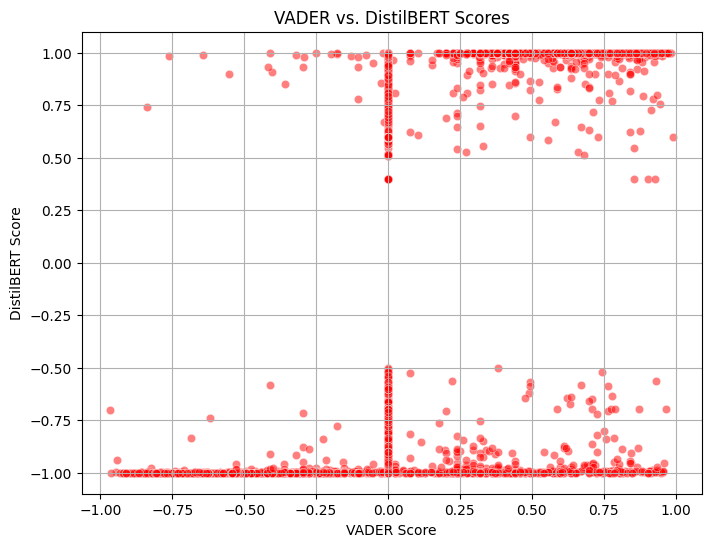

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_score', y='DistilBERT_score', data=combined_reviews_df, alpha=0.5, color='red')
plt.title('VADER vs. DistilBERT Scores')
plt.xlabel('VADER Score')
plt.ylabel('DistilBERT Score')
plt.grid(True)
plt.show()

Correlation analysis between the results of all sentiment analysis methods.

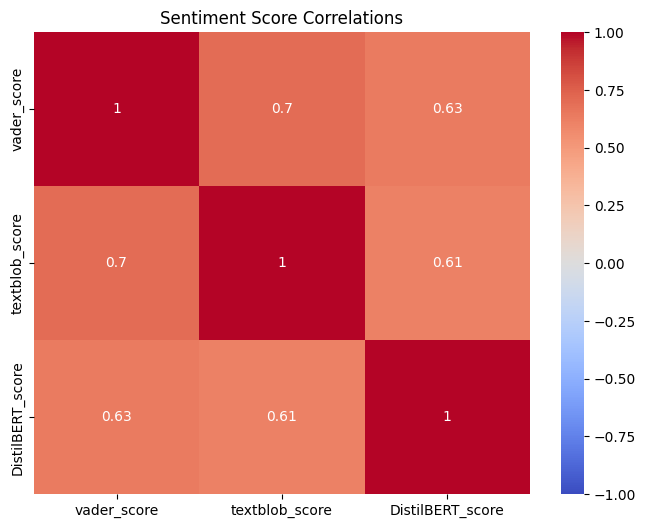

In [32]:
# Calculate correlations
corr = combined_reviews_df[['vader_score', 'textblob_score', 'DistilBERT_score']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sentiment Score Correlations')
plt.show()

Mean Absolute Scores

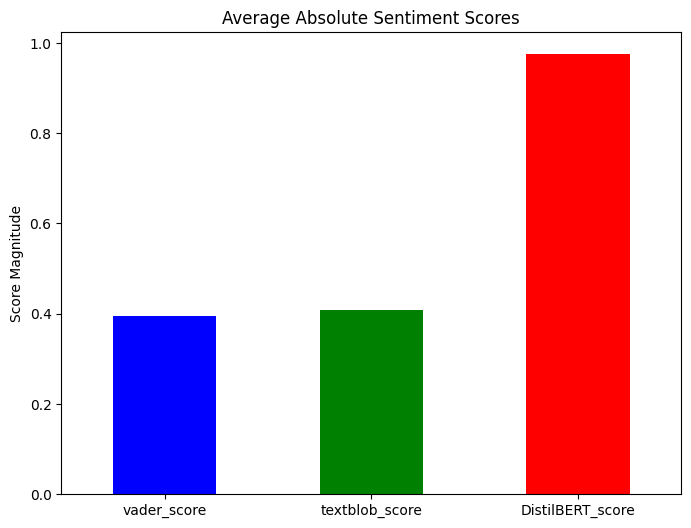

In [33]:
# Calculate mean absolute scores
mean_scores = combined_reviews_df[['vader_score', 'textblob_score', 'DistilBERT_score']].abs().mean()

plt.figure(figsize=(8, 6))
mean_scores.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Absolute Sentiment Scores')
plt.ylabel('Score Magnitude')
plt.xticks(rotation=0)
plt.show()

Aggregate by bank and ratings, calculating the mean for each sentiment analysis method

In [34]:
# Group by 'bank' and 'rating', then calculate mean sentiment scores
agg_sentiment = combined_reviews_df.groupby(['bank', 'rating']).agg({
    'vader_score': 'mean',
    'textblob_score': 'mean',
    'DistilBERT_score': 'mean'
}).reset_index()

# Optional: Round scores for readability
agg_sentiment = agg_sentiment.round(3)

In [35]:
agg_sentiment

,bank,rating,vader_score,textblob_score,DistilBERT_score
0,Bank of Abyssinia,1,-0.180,-0.130,-0.784
1,Bank of Abyssinia,2,-0.054,-0.003,-0.754
2,Bank of Abyssinia,3,0.169,0.148,-0.258
3,Bank of Abyssinia,4,0.297,0.361,0.247
4,Bank of Abyssinia,5,0.376,0.456,0.635
5,Commercial Bank of Ethiopia,1,-0.084,-0.018,-0.605
6,Commercial Bank of Ethiopia,2,0.024,0.130,-0.445
7,Commercial Bank of Ethiopia,3,0.188,0.263,-0.113
8,Commercial Bank of Ethiopia,4,0.350,0.415,0.355
9,Commercial Bank of Ethiopia,5,0.396,0.466,0.723


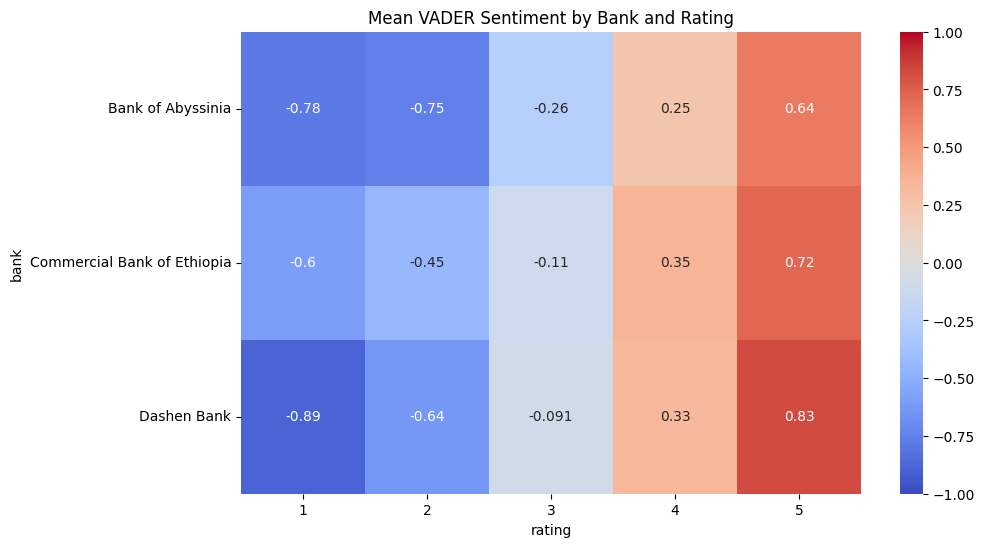

In [36]:
# Pivot for heatmap (example: DistilBERT_score)
heatmap_data = agg_sentiment.pivot(index='bank', columns='rating', values='DistilBERT_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Mean VADER Sentiment by Bank and Rating')
plt.show()

**Thematic Analysis**

1. Data Preprocessing

In [38]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase, remove punctuation, and lemmatize
    doc = nlp(text.lower().strip())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Apply preprocessing
combined_reviews_df['cleaned_review'] = combined_reviews_df['review'].apply(preprocess_text)

In [39]:
combined_reviews_df[['cleaned_review', 'review']]


,cleaned_review,review
0,send cbebirr app app,I cannot send to cbebirr app. through this app.
1,good,good
2,functional,not functional
3,everytime uninstall app reach physically oldy ...,everytime you uninstall the app you have to re...
4,well,best
...,...,...
6366,second oher bank work intersection addisintely...,Second to Oher Bank is not working in intersec...
6367,v good,V good ❗️
6368,good,it's good
6369,,Name only


2. Keyword Extraction

TF-IDF-Based Keyword Extraction from Cleaned Reviews

In [84]:
tfidf = TfidfVectorizer(
    ngram_range=(2, 3),
    max_features=200,
    min_df=5,
    max_df=0.85,
    # stop_words=list(financial_stopwords)
)

tfidf_matrix = tfidf.fit_transform(combined_reviews_df['cleaned_review'])
feature_names = tfidf.get_feature_names_out()
keyword_scores = tfidf_matrix.sum(axis=0).A1
keyword_ranking = sorted(
    zip(feature_names, keyword_scores),
    key=lambda x: x[1],
    reverse=True
)

for rank, (phrase, score) in enumerate(keyword_ranking, 1):
    print(f"{rank:>4}. {phrase.replace(' ', '_'):<30} Score: {score:.2f}")


   1. good_app                       Score: 355.07
   2. nice_app                       Score: 127.58
   3. easy_use                       Score: 86.08
   4. mobile_banking                 Score: 85.32
   5. good_application               Score: 49.87
   6. bad_app                        Score: 47.75
   7. great_app                      Score: 46.80
   8. app_work                       Score: 46.68
   9. banking_app                    Score: 46.54
  10. user_friendly                  Score: 38.02
  11. like_app                       Score: 36.70
  12. excellent_app                  Score: 36.50
  13. app_good                       Score: 36.47
  14. developer_option               Score: 35.06
  15. amazing_app                    Score: 34.86
  16. dashen_bank                    Score: 29.20
  17. update_app                     Score: 29.13
  18. bank_ethiopia                  Score: 28.97
  19. use_app                        Score: 28.20
  20. good_service                   Score: 27.4

Bank-Wise Aggregated Keyword Extraction Using TF-IDF

In [85]:
banks = combined_reviews_df['bank'].unique()
bank_keywords = {}


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

for bank in banks:
    bank_reviews = combined_reviews_df[combined_reviews_df['bank'] == bank]['cleaned_review']

    tfidf = TfidfVectorizer(
        ngram_range=(2, 3),
        max_features=100,
        min_df=3,
        max_df=0.85,
        # stop_words=financial_stopwords
    )

    tfidf_matrix = tfidf.fit_transform(bank_reviews)
    feature_names = tfidf.get_feature_names_out()
    keyword_scores = tfidf_matrix.sum(axis=0).A1
    keyword_ranking = sorted(zip(feature_names, keyword_scores), key=lambda x: x[1], reverse=True)

    bank_keywords[bank] = keyword_ranking


In [47]:
for bank, keywords in bank_keywords.items():
    print(f"Top keywords for {bank}:")
    for phrase, score in keywords[:15]:
        print(f" - {phrase} ({score:.2f})")
    print("\n")


Top keywords for Commercial Bank of Ethiopia:
 - good app (309.06)
 - nice app (116.21)
 - easy use (75.09)
 - mobile banking (58.68)
 - good application (45.33)
 - great app (42.08)
 - like app (36.54)
 - app good (31.38)
 - app work (28.30)
 - amazing app (27.76)
 - excellent app (27.60)
 - user friendly (27.52)
 - banking app (27.41)
 - good service (24.75)
 - bank ethiopia (24.50)


Top keywords for Bank of Abyssinia:
 - good app (34.88)
 - bad app (27.10)
 - mobile banking (23.65)
 - app work (19.68)
 - banking app (16.10)
 - developer option (15.89)
 - nice app (8.72)
 - work properly (8.60)
 - mobile banking app (8.28)
 - update app (8.26)
 - easy use (8.05)
 - boa mobile (8.01)
 - boa app (7.88)
 - keep crash (7.78)
 - use app (7.18)


Top keywords for Dashen Bank:
 - good app (22.59)
 - dashen bank (21.39)
 - super app (19.24)
 - user friendly (10.75)
 - step ahead (10.74)
 - dashen super (9.55)
 - easy use (9.04)
 - dashen super app (8.64)
 - banking app (8.27)
 - mobile bank

Thematic Categorization of Bank App Keywords

In [88]:
def group_keywords_into_themes(bank_keywords_dict, bank_name):
    bank_theme_definitions = {
        'Account Access Issues': ['account', 'login', 'password', 'access', 'otp', 'verify', 'register'],
        'Transaction Performance': ['transaction', 'transfer', 'payment', 'send money', 'receive money', 'speed', 'process', 'complete', 'fail'],
        'User Interface & Experience': [
            'app', 'user friendly', 'easy use', 'interface', 'design', 'experience',
            'good app', 'bad app', 'update', 'crash', 'nice app', 'mobile banking',
            'good application', 'great app', 'like app', 'app good', 'app work',
            'amazing app', 'excellent app', 'banking app', 'work properly',
            'mobile banking app', 'update app', 'super app', 'step ahead',
            'supper app', 'game changer', 'keep crash', 'use app','good', 'easy', 'use'
        ],
        'Customer Support': ['customer service', 'support', 'help', 'call', 'staff', 'branch', 'good service'],
        'Feature Requests': ['feature', 'option', 'add', 'need', 'wish', 'improve', 'developer option'],
        'Bank-Specific Features': [
            'boa mobile', 'boa app', 'dashen bank', 'dashen super',
            'dashen super app', 'bank super', 'bank ethiopia'
        ],
        'Digital Banking': ['mobile banking', 'digital banking', 'banking app'],
        'App Performance & Stability': [
            'crash', 'update', 'app work', 'work properly',
            'keep crash', 'update app'
        ],
        'Brand Perception': [
            'good app', 'bad app', 'nice app', 'great app',
            'amazing app', 'excellent app', 'super app',
            'step ahead', 'game changer'
        ]
    }

    keywords_only = [phrase for phrase, score in bank_keywords_dict.get(bank_name, [])]
    bank_themes = {theme: [] for theme in bank_theme_definitions.keys()}
    assigned_keywords = set()

    for theme, definitions in bank_theme_definitions.items():
        for keyword in keywords_only:
            if any(definition in keyword for definition in definitions):
                if keyword not in assigned_keywords:
                    bank_themes[theme].append(keyword)
                    assigned_keywords.add(keyword)

    bank_themes['Other'] = [kw for kw in keywords_only if kw not in assigned_keywords]
    return bank_themes

bank_themes_results = {bank: group_keywords_into_themes(bank_keywords, bank) for bank in banks}
cbe_themed_keywords = bank_themes_results.get('Commercial Bank of Ethiopia')
dashen_themed_keywords = bank_themes_results.get('Dashen Bank')
boa_themed_keywords = bank_themes_results.get('Bank of Abyssinia')

In [90]:
print(boa_themed_keywords)

{'Account Access Issues': ['access account'], 'Transaction Performance': ['transfer money', 'send money'], 'User Interface & Experience': ['good app', 'bad app', 'mobile banking', 'app work', 'banking app', 'nice app', 'work properly', 'mobile banking app', 'update app', 'easy use', 'boa app', 'keep crash', 'use app', 'good bank', 'open app', 'poor app', 'useless app', 'bad mobile banking', 'app boa', 'bank app', 'wor app', 'mobile app', 'good application', 'new update', 'app update', 'excellent app', 'great app', 'app like', 'good good', 'new app', 'app crash', 'app see', 'version app', 'need update', 'app bad', 'good job', 'app good', 'problem app', 'crash frequently', 'app keep', 'app bank', 'awesome app', 'app allow', 'crash fix', 'app need', 'fix app', 'bad application', 'user friendly', 'app fix', 'app get', 'application work', 'use mobile', 'update version', 'crash time', 'bad experience', 'use mobile banking', 'poor mobile banking', 'boa mobile banking', 'banking app work', 'ap

In [91]:
print(cbe_themed_keywords)

{'Account Access Issues': ['account number', 'bank account'], 'Transaction Performance': ['transaction history', 'transfer money', 'recent transaction', 'send money', 'transfer telebirr', 'money transfer', 'transaction list', 'transfer bank'], 'User Interface & Experience': ['good app', 'nice app', 'easy use', 'mobile banking', 'good application', 'great app', 'like app', 'app good', 'app work', 'amazing app', 'excellent app', 'user friendly', 'banking app', 'good service', 'update app', 'use app', 'bad app', 'good job', 'cbe app', 'good work', 'new update', 'simple use', 'app like', 'mobile banking app', 'good bank', 'easy fast', 'good mobile', 'work properly', 'late update', 'bank app', 'nice application', 'good good', 'interesting app', 'good mobile banking', 'app time', 'app thank', 'good easy', 'fast easy', 'app use', 'life easy', 'app fast', 'app easy', 'good fast', 'smart app', 'simple easy', 'fantastic app', 'good time', 'poor app', 'app need', 'app see', 'useful app', 'app cbe

In [92]:
print(dashen_themed_keywords)

{'Account Access Issues': [], 'Transaction Performance': ['transfer telebirr', 'bill payment', 'fast transaction', 'smooth transaction', 'transfer money', 'platform smooth transaction', 'balance transfer', 'balance transfer money', 'check balance transfer'], 'User Interface & Experience': ['good app', 'super app', 'user friendly', 'step ahead', 'easy use', 'dashen super app', 'banking app', 'mobile banking', 'amazing app', 'supper app', 'game changer', 'nice app', 'excellent app', 'bank super app', 'mobile banking app', 'app easy', 'new update', 'good work', 'amazing application', 'app good', 'app dashen', 'app work', 'user interface', 'good mobile', 'fast easy', 'app secure', 'app look', 'super easy', 'good good', 'life easy', 'app easy use', 'app see', 'app bank', 'app make', 'super easy use', 'app experience', 'app dashen bank', 'dashen supper app', 'bank step ahead', 'easy fast', 'dashen superapp', 'fast easy use', 'banking application', 'friendly app', 'changer app', 'game changer

Keyword Clusters for Bank App Reviews: CBE, BOA, and Dashen

In [96]:
cbe_clusters = {
    "User Experience & Design": [
        "good app", "nice app", "great app", "like app", "amazing app",
        "excellent app", "user friendly", "app good", "easy to use",
        "simple", "intuitive", "smooth", "well designed", "clean interface",'good','best'
    ],
    "Functionality & Features": [
        "easy use", "app work", "good application", "banking app",
        "send money", "transfer", "pay bill", "mobile banking",
        "receive money", "transaction", "utility payment"
    ],
    "Technical Issues": [
        "not working", "crash", "error", "bug", "problem",
        "issue", "slow", "freeze", "hang", "update needed",
        "fix", "improve", "bad app"
    ],
    "Account Access": [
        "login", "password", "otp", "verify", "register",
        "account", "access", "blocked", "forgot password",
        "authentication", "security"
    ],
    "Customer Support": [
        "customer service", "support", "help", "contact",
        "response", "assistance", "call center", "branch"
    ]
}

boa_clusters = {
    "User Experience": [
        "good app", "nice app", "easy use", "use app",
        "simple", "intuitive", "smooth", "well designed",'good','best'
    ],
    "App Performance": [
        "bad app", "keep crash", "app work", "work properly",
        "update app", "slow", "freeze", "hang", "bug",
        "error", "problem", "issue"
    ],
    "Banking Services": [
        "mobile banking", "banking app", "mobile banking app",
        "boa mobile", "boa app", "transfer", "payment",
        "send money", "receive money", "transaction"
    ],
    "Technical Features": [
        "developer option", "settings", "configuration",
        "feature", "option", "customize", "preferences"
    ],
    "Security & Access": [
        "login", "password", "otp", "verify", "account",
        "access", "blocked", "security", "authentication"
    ]
}

dashen_clusters = {
    "Brand & Innovation": [
        "dashen bank", "step ahead", "game changer",
        "innovative", "modern", "advanced", "leading"
    ],
    "User Experience": [
        "good app", "user friendly", "easy use", "amazing app",
        "nice app", "great app", "smooth", "intuitive",
        "well designed", "clean interface",'good','best'
    ],
    "Digital Banking": [
        "mobile banking", "banking app", "digital banking",
        "super app", "dashen super", "dashen super app",
        "supper app", "bank super", "transfer", "payment"
    ],
    "Technical Problems": [
        "not working", "crash", "error", "bug", "problem",
        "issue", "slow", "freeze", "hang", "update needed"
    ],
    "Customer Service": [
        "customer service", "support", "help", "contact",
        "response", "assistance", "call center", "branch"
    ]
}

In [98]:
combined_reviews_df = combined_reviews_df.reset_index(drop=True)


Enhanced Theme Identification with Fuzzy Matching for Bank App Reviews

In [107]:
# Enhanced theme clusters with more comprehensive keyword coverage

!pip install fuzzywuzzy[speedup]

# Enhanced theme identification function with fuzzy matching
from fuzzywuzzy import fuzz

def identify_themes_from_clusters(cleaned_text, bank):
    matched_themes = set()

    # Select the appropriate clusters based on the bank
    if bank == 'Commercial Bank of Ethiopia':
        theme_clusters = cbe_clusters
    elif bank == 'Dashen Bank':
        theme_clusters = dashen_clusters
    elif bank == 'Bank of Abyssinia':
        theme_clusters = boa_clusters
    else:
        return ["Unknown Bank Themes"]

    # Split text into words and create n-grams (up to 3 words)
    words = cleaned_text.split()
    ngrams = []
    for n in range(1, 4):
        ngrams += [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

    # Check for matches with fuzzy matching
    for theme, keywords in theme_clusters.items():
        for keyword in keywords:
            # Check exact matches first
            if keyword in cleaned_text:
                matched_themes.add(theme)
                continue

            # Check fuzzy matches for similar phrases
            for ngram in ngrams:
                if fuzz.ratio(keyword.lower(), ngram.lower()) > 80:  # 80% similarity threshold
                    matched_themes.add(theme)
                    break

    return list(matched_themes) if matched_themes else ["General Feedback"]

# Apply the enhanced theme identification function
combined_reviews_df['identified_themes'] = combined_reviews_df.apply(
    lambda row: identify_themes_from_clusters(row['cleaned_review'], row['bank']),
    axis=1
)

# Convert the list of themes into a comma-separated string for CSV output
combined_reviews_df['identified_themes_str'] = combined_reviews_df['identified_themes'].apply(
    lambda themes_list: ', '.join(themes_list)
)
if 'review_id' not in combined_reviews_df.columns:
    combined_reviews_df = combined_reviews_df.reset_index().rename(columns={'index': 'review_id'})
else:
    # If review_id exists, just ensure it's unique
    combined_reviews_df = combined_reviews_df.reset_index(drop=True)

# Create the simplified output with requested columns
simplified_output = combined_reviews_df[[
    'review_id',
    'cleaned_review',
    'DistilBERT_label',
    'DistilBERT_score',
    'identified_themes_str',
    'bank',
    'rating',

]].rename(columns={
    'cleaned_review': 'review_text',
    'DistilBERT_label': 'sentiment_label',
    'DistilBERT_score': 'sentiment_score',
    'identified_themes_str': 'identified_theme(s)'
})

# Save the simplified output
simplified_output.to_csv('enhanced_sentiment_analysis.csv', index=False, encoding='utf-8')



In [108]:
simplified_output

,review_id,review_text,sentiment_label,sentiment_score,identified_theme(s),bank,rating
0,0,send cbebirr app app,negative,-0.995335,General Feedback,Commercial Bank of Ethiopia,3
1,1,good,positive,0.999816,User Experience & Design,Commercial Bank of Ethiopia,4
2,2,functional,negative,-0.999779,General Feedback,Commercial Bank of Ethiopia,1
3,3,everytime uninstall app reach physically oldy ...,negative,-0.990516,Account Access,Commercial Bank of Ethiopia,1
4,4,well,positive,0.999794,General Feedback,Commercial Bank of Ethiopia,5
...,...,...,...,...,...,...,...
6366,6366,second oher bank work intersection addisintely...,negative,-0.999644,General Feedback,Dashen Bank,2
6367,6367,v good,positive,0.999386,User Experience,Dashen Bank,5
6368,6368,good,positive,0.999836,User Experience,Dashen Bank,5
6369,6369,,negative,-0.959507,General Feedback,Dashen Bank,2


In [109]:
files.download('enhanced_sentiment_analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>